# Part 3: Cancer

In this part of the assignment, you will build a predictive model to classify a given breast tumor as cancer or not based on exam measurements of the size and shape of the tumor. 

**Learning objectives.** You will:
1. Train and test a logistic regression model for binary classification. 
2. Evaluate and interpret a range of metrics including the confusion matrix, precision, recall, and ROC curve.
3. Look for evidence of overfitting and perform hyperparameter selection to choose a regularization weight on a validation set to mitigate overfitting.
4. Fit and discuss an interpretable shallow decision tree model.

The following code will download all of the data, print the feature names, and preview one example. The target value is binary: either `1` or `0` depending on whether the tumor is malignant or benign.

The code stores the feature matrix `X` as a two-dimensional NumPy array where each row corresponds to a data point and each column is a feature. The target value is stored as a one-dimensional NumPy array `y` where the index `i` element of `y` correpsonds to the row `i` data point of `X`.

Your overall goal in this part is to build and evaluate a logistic model to predict the target variable `y` as a function of the ten features in `X` by predicting the probability that a given tumor is malignant.

In [169]:
# Run but DO NOT MODIFY this code

from sklearn.datasets import load_breast_cancer

# Load the diabetes dataset
cancer = load_breast_cancer()
print(cancer.feature_names)

# Get the feature data and target variable
X = cancer.data
y = cancer.target

# Preview the first data point
print(X[0])
print(y[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


## Task 1

Randomly split the input data into a [train and test partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with at least 30% of the data reserved for testing. Use a random seed of `2024` for reproducibility of the results. 

In [172]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3, random_state=2024)

## Task 2

Build and evaluate a baseline model as follows. Calculate the proportion of the training data with target `1`, call this proportion `p`. For each example in the test data, randomly predict `1` with probability `p` and `0` otherwise. Set a random seed of `2024` before starting for reproducibility.

Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Briefly interpret the confusion matrix, precision, and recall. What do these quantities mean in the context of the predictive task?

Recall Score:0.5769230769230769
Precision Score:0.7142857142857143


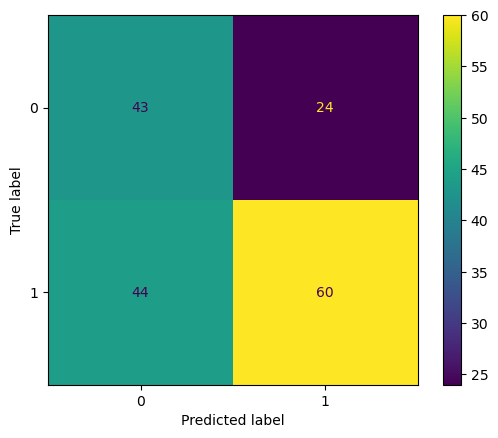

In [175]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
p=np.mean(y_train)
np.random.seed(2024)
random_out=np.random.randint(0,2,(1,len(y_test)))
random_out=random_out[0]
cm = confusion_matrix(y_test, random_out)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(f'Recall Score:{recall_score(y_test, random_out)}')
print(f'Precision Score:{precision_score(y_test, random_out)}')

According to the decision matrix, the random numbers predicted the values 50-60% correctly(TN&TP). The recall tells us that we correctly predicted 57% of the 1s, and precision tells us that of the 1s we predicted, 71% of them were correct. These numbers all seem plausible because of the 50% chance of randomly choosing a 1 or a 0 (although 71% for precision is pretty high).

## Task 3

Randomly split the *training* data into a *train* and *validation* set; similar to how you [randomly split the original dataset](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with 30% of the training data (equals 70% times 30% = 21% of the overall data) reserved for the validation set. Use a random seed of `2024` for reproducibility of the results.

Build a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) on the train set with the parameter setting `penalty = 'None'` (this will train a basic model without applying any regularization). 

Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of your model on both (a) the train set, and (b) the validation set. Report your results and briefly explain whether you find evidence of *overfitting*, along with a brief description of what that means. 

If you do find evidence of overfitting, retrain the model (potentially multiple times) to reduce the overfitting by changing the `penalty` parameter to `l2` (this is the default) and trying different values of the `C` hyperparameter that controls the strength of regularization. Show your work and explain in English how you decided on a good setting of the hyperparameter `C` controlling the degree of regularization. 

You should conclude this task by reporting a final model that achieves comparable accuracy on the train set as the unregularized model and that mitigates any evidence of overfitting (it may not be possible to achieve a validation error that is no greater than the train error, but you should reduce the gap).

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV
X_train2, X_val, y_train2, y_val=train_test_split(X_train, y_train,test_size=0.3,random_state=2024)
model=LogisticRegression(max_iter=100000, penalty=None)
model.fit(X_train2,y_train2)
train_probs=model.predict(X_train2)
val_probs=model.predict(X_val)
print(f'train accuracy before val:{acc(y_train2,train_probs)}')
print(f'val accuracy before val:{acc(y_val,val_probs)}')
model=LogisticRegression(max_iter=100000, penalty='l2', C=2000)
model.fit(X_train2,y_train2)
train_probs=model.predict(X_train2)
val_probs=model.predict(X_val)
print(f'train accuracy after val:{acc(y_train2,train_probs)}')
print(f'val accuracy after val:{acc(y_val,val_probs)}')

train accuracy before val:1.0
val accuracy before val:0.975
train accuracy after val:0.9856115107913669
val accuracy after val:0.9666666666666667


Prior to regularization, I observed a .025 difference between the accuracy of the training set and the validation set. I believe this was overfitting because I predicted the accuracy of the training set 100% of the time. So, I increased C (the strength of regularization) until I observed the smallest gap between the training accuracy and validation accuracy. I ended up finding the best strength to be C=2000 with a regularization gap of 0.01894. However, I believe this is negligible because there isn't that much of a difference between the regularization gap prior to regularization and after regularization.

## Task 4

For the final model you trained in task 3, compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Based on your results, briefly describe how the resulting model is an improvement over the baseline from task 2, interpreting the reported metrics in the context of the predictive task.

Recall Score:0.9423076923076923
Precision Score:0.98


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


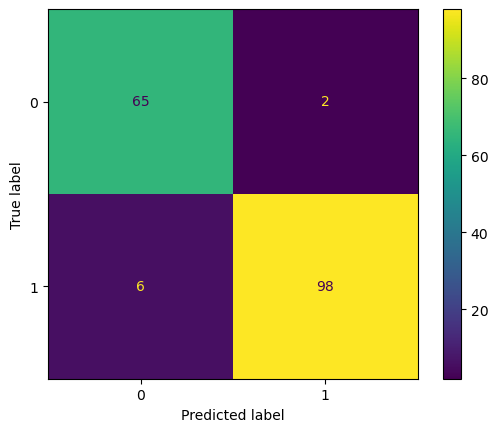

In [183]:
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(f'Recall Score:{recall_score(y_test, y_hat)}')
print(f'Precision Score:{precision_score(y_test, y_hat)}')

According to the confusion matrix, the model correctly predicts about 95% of the entries (TN+TN). This is much better than the baseline set in task 2, where we only predicted about 50% of the entries correctly. According to the 98% precision score, the model is extremely trustworthy when it predicts a tumor to be malignant. Although less accurately, the model is also well trained to correctly identify the difference between malignant and benign tumors with a recall scoren of 94%.

## Task 5

For the predictions of your final model trained in task 3, compute and visualize the [Receiver Operator Characteristic (ROC) Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#roccurvedisplay). Note that you need to use the *probability predictions* of the model, *not* the absolute 0/1 predictions, in order to correctly plot the ROC curve.

Briefly interpret the ROC curve. In particular, what change(s) in the model account for the different possible false positive rates and true positive rates represented on the curve? In the context of a cancer detection task, why might one prefer to select a point on the curve other than the default (represented by your previous results in task 4)?

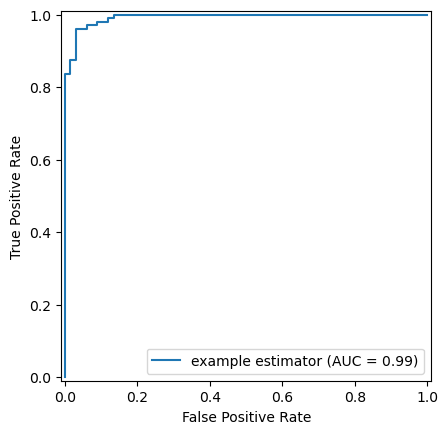

In [187]:
from sklearn import metrics
test_probs=model.predict_proba(X_test)
test_probs=test_probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_probs)
roc_auc=metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

You can tell from the ROC curve that the rate of correct answers is reliant on the classification threshold; although you could predict positives correctly with a low classification threshold, you will also predict many false positives. For cancer detection, you want to minimize false positives because a incorrect prediction like that can change the life of the person and the people around them.

## Task 6

In practice, it can be very helpful to under **why** a predictive model made a particular prediction. *Interpretable* models have the property that a human can understand this aspect. One example of an interpretable model is the *decision tree*, especially a *shallow* decision tree.

Build three [decision tree classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), one for each setting of the `max_depth` hyperparameter to `3`, `5`, and `7`. Fit each model on the train set from task 3, and evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of each model on the validation set (also from task 3). 

Report all of these validation measures for each model corresponding to different settings of `max_depth`, and select one as your final model. Briefly explain why you would select that model for this task. Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of your final decision tree model.


3
train accuracy3:0.9892086330935251
val accuracy3:0.925
Recall Score3:0.9722222222222222
Precision Score3:0.9090909090909091

5
train accuracy5:0.9928057553956835
val accuracy5:0.8916666666666667
Recall Score:0.9027777777777778
Precision Score:0.9154929577464789

7
train accuracy7:1.0
val accuracy7:0.8833333333333333
Recall Score:0.8888888888888888
Precision Score:0.9142857142857143


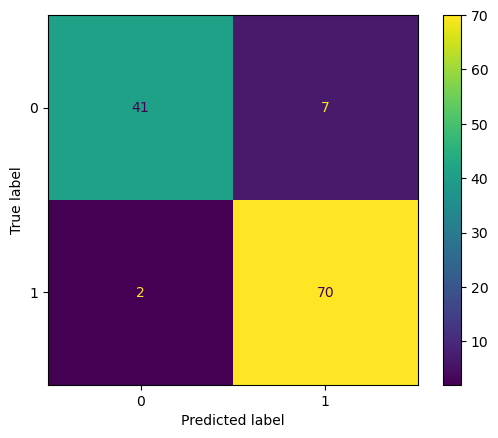

In [191]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0, max_depth=3)
model5 = DecisionTreeClassifier(random_state=0, max_depth=5)
model7 = DecisionTreeClassifier(random_state=0, max_depth=7)
model3.fit(X_train2,y_train2)
model5.fit(X_train2,y_train2)
model7.fit(X_train2,y_train2)
train_probs3=model3.predict(X_train2)
val_probs3=model3.predict(X_val)
print('\n3')
print(f'train accuracy3:{acc(y_train2,train_probs3)}')
print(f'val accuracy3:{acc(y_val,val_probs3)}')
print(f'Recall Score3:{recall_score(y_val, val_probs3)}')
print(f'Precision Score3:{precision_score(y_val,val_probs3)}')
print('\n5')
train_probs5=model5.predict(X_train2)
val_probs5=model5.predict(X_val)
print(f'train accuracy5:{acc(y_train2,train_probs5)}')
print(f'val accuracy5:{acc(y_val,val_probs5)}')
print(f'Recall Score:{recall_score(y_val,val_probs5)}')
print(f'Precision Score:{precision_score(y_val,val_probs5)}')
print('\n7')
train_probs7=model7.predict(X_train2)
val_probs7=model7.predict(X_val)
print(f'train accuracy7:{acc(y_train2,train_probs7)}')
print(f'val accuracy7:{acc(y_val,val_probs7)}')
print(f'Recall Score:{recall_score(y_val,val_probs7)}')
print(f'Precision Score:{precision_score(y_val,val_probs7)}')

cm = confusion_matrix(y_val, val_probs3)
cm_display = ConfusionMatrixDisplay(cm).plot()

I would chose the decision tree with 3 layers. The trees with 5 and 7 layers are clearly overfitting, the validation gap is large for both.